In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix

import scipy.stats as stats
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [3]:
df = pd.read_csv('clear_df.csv', sep='\t')
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.000000,22.730000,0,2,1,180.3,1,92,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,77.000000,27.420000,0,2,0,160.0,1,90,0,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
2,25.000000,31.950000,0,2,0,172.7,0,93,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,0
3,81.000000,22.640000,1,2,0,165.1,2,92,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,19.000000,29.264902,0,2,1,188.0,0,91,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,2,1,177.8,1,927,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0,0
91709,56.000000,47.179671,0,2,0,183.0,1,925,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0
91710,48.000000,27.236914,0,2,1,170.2,0,908,0,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3,0
91711,61.748741,23.297481,0,2,0,154.9,0,922,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,0


In [4]:
y = df.hospital_death
X = df.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

73370
18343
73370
18343


## SVM (pipeline)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Precision: 0.9541
Recall: 0.9077
Accuracy: 0.9788
F1 Score: 0.9293
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16756
           1       0.92      0.82      0.87      1587

    accuracy                           0.98     18343
   macro avg       0.95      0.91      0.93     18343
weighted avg       0.98      0.98      0.98     18343



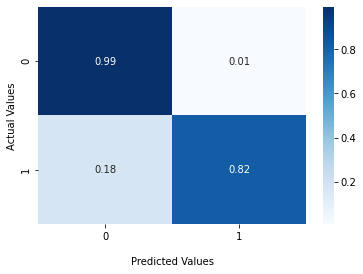

In [13]:
clf = make_pipeline(StandardScaler(), SVC(max_iter=4)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

## Logistic Regression

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.9628
Recall: 0.9556
Accuracy: 0.9872
F1 Score: 0.9592
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16756
           1       0.93      0.92      0.93      1587

    accuracy                           0.99     18343
   macro avg       0.96      0.96      0.96     18343
weighted avg       0.99      0.99      0.99     18343



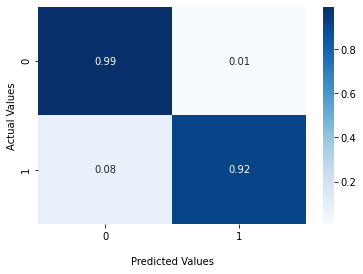

In [14]:
logreg = LogisticRegression(max_iter=500).fit(X_train, y_train)
pred = logreg.predict(X_test)
y_pred = tf.cast(tf.round(pred), tf.int32).numpy().flatten()

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

## SGD Classifier

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Precision: 0.9490
Recall: 0.9323
Accuracy: 0.9815
F1 Score: 0.9404
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16756
           1       0.91      0.87      0.89      1587

    accuracy                           0.98     18343
   macro avg       0.95      0.93      0.94     18343
weighted avg       0.98      0.98      0.98     18343



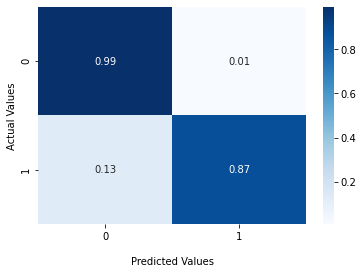

In [15]:
clf = SGDClassifier(loss="log_loss", penalty="l1", shuffle=False, max_iter=200).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()